### IMPORT LIBRARIES & DATA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


### DATA ENGINEERING

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
df['year_month'] = list(map(lambda invoice_date: invoice_date.year*100+invoice_date.month, df['InvoiceDate']))

In [10]:
df['net_sales']= df['Quantity']*df['UnitPrice']

In [11]:
df['net_sales'].sum()

9747747.933999998

In [12]:
first_purchase = df.groupby(['CustomerID'])['year_month'].min().reset_index()

In [13]:
first_purchase

,CustomerID,year_month
0,12346.0,201101
1,12347.0,201012
2,12348.0,201012
3,12349.0,201111
4,12350.0,201102
...,...,...
4367,18280.0,201103
4368,18281.0,201106
4369,18282.0,201108
4370,18283.0,201101


In [14]:
first_purchase.columns = ['CustomerID', 'enroll_date']

In [15]:
df = df.merge(first_purchase, left_on='CustomerID', right_on='CustomerID')

In [16]:
# there were few nan value in CustomerID, hence we have few rows
df.shape

(406829, 11)

In [17]:
df['cust_type'] = np.where(df['year_month'] > df['enroll_date'], 'existing_cust', 'new_cust')

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year_month,net_sales,enroll_date,cust_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,201012,new_cust
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,201012,new_cust
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,201012,new_cust
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,201012,new_cust
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,201012,new_cust


### KPI I - Monthly Revenue

In [19]:
temp1 = df.groupby('year_month').sum()['net_sales'].reset_index()

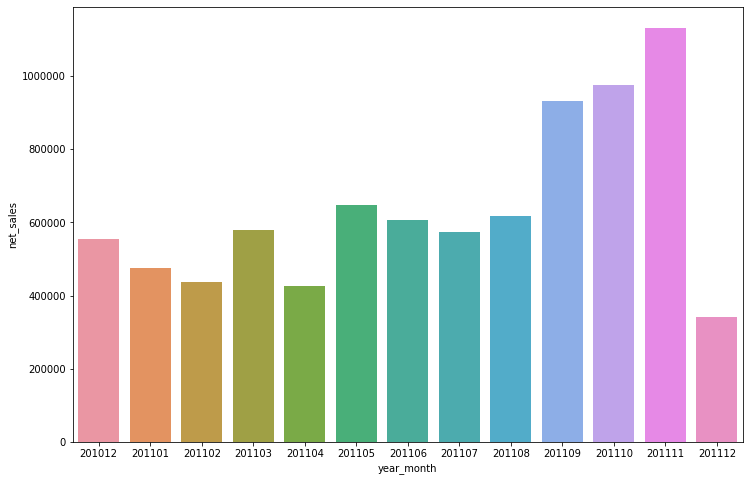

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(temp1['year_month'], temp1['net_sales'])

### KPI II - Monthly Sales Quantity

In [21]:
temp2 = df.groupby('year_month').sum()['Quantity'].reset_index()

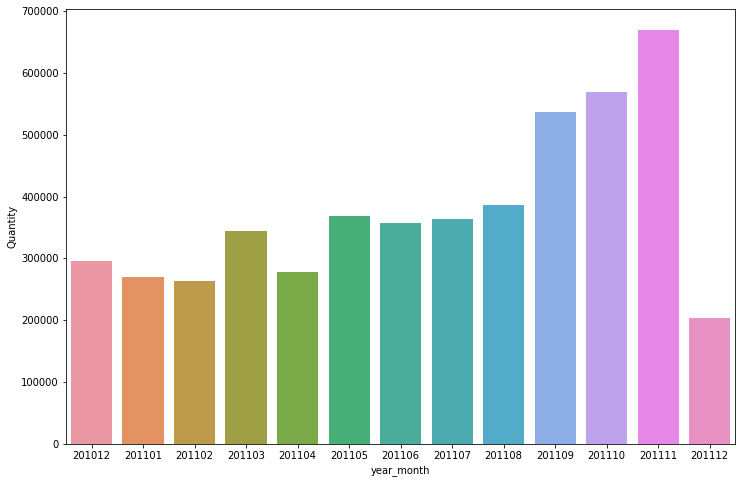

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(temp2['year_month'], temp2['Quantity'])

### KPI III - Monthly Revenue Growth Rate

In [23]:
temp3 = df.groupby('year_month').sum()['net_sales'].reset_index()

In [24]:
temp3['growth_rate'] = temp3['net_sales'].pct_change()

In [25]:
temp3.fillna(0, inplace=True)

In [26]:
temp3['year_month'] = temp3['year_month'].astype(str)

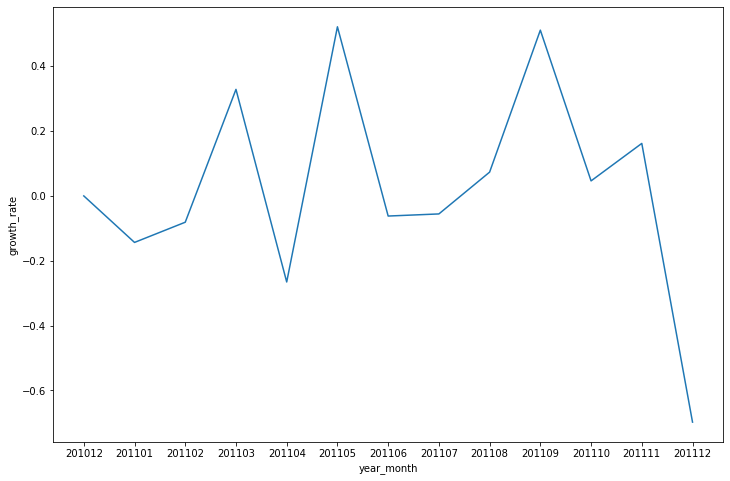

In [27]:
plt.figure(figsize=(12,8))
sns.lineplot(temp3['year_month'], temp3['growth_rate'])

### KPI IV - Average Value Per Order

In [28]:
temp4 = df.groupby('year_month').sum()['net_sales'].reset_index()

In [29]:
temp4 = temp4.merge(df.groupby('year_month').nunique()['InvoiceNo'].reset_index(), on='year_month')

In [30]:
temp4['Avg_order_value'] = temp4['net_sales']/temp4['InvoiceNo']

In [31]:
temp4

,year_month,net_sales,InvoiceNo,Avg_order_value
0,201012,554604.020,1708,324.709614
1,201101,475074.380,1236,384.364385
2,201102,436546.150,1202,363.183153
3,201103,579964.610,1619,358.223972
4,201104,426047.851,1384,307.838043
5,201105,648251.080,1849,350.595500
6,201106,608013.160,1707,356.188143
7,201107,574238.481,1593,360.476134
8,201108,616368.000,1544,399.202073
9,201109,931440.372,2078,448.238870


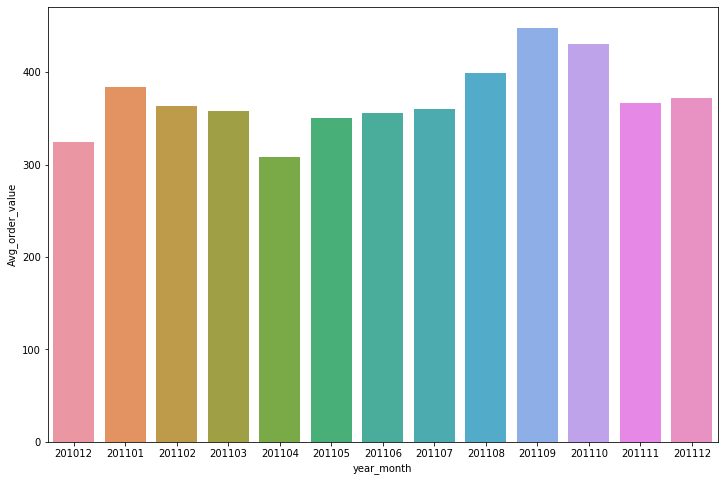

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(temp4['year_month'], temp4['Avg_order_value'])

### KPI V - Average Order Quantity

In [33]:
temp5 = df.groupby('year_month').sum()['Quantity'].reset_index()

In [34]:
temp5

,year_month,Quantity
0,201012,296362
1,201101,269379
2,201102,262833
3,201103,344012
4,201104,278585
5,201105,367852
6,201106,356922
7,201107,363418
8,201108,386612
9,201109,537496


In [35]:
temp5 = temp5.merge(df.groupby('year_month').nunique()['InvoiceNo'].reset_index(), on='year_month')

In [36]:
temp5

,year_month,Quantity,InvoiceNo
0,201012,296362,1708
1,201101,269379,1236
2,201102,262833,1202
3,201103,344012,1619
4,201104,278585,1384
5,201105,367852,1849
6,201106,356922,1707
7,201107,363418,1593
8,201108,386612,1544
9,201109,537496,2078


In [37]:
temp5['Avg_order_Qty'] = temp5['Quantity']/temp5['InvoiceNo']

In [38]:
temp5

,year_month,Quantity,InvoiceNo,Avg_order_Qty
0,201012,296362,1708,173.514052
1,201101,269379,1236,217.944175
2,201102,262833,1202,218.663062
3,201103,344012,1619,212.484250
4,201104,278585,1384,201.289740
5,201105,367852,1849,198.946458
6,201106,356922,1707,209.093146
7,201107,363418,1593,228.134338
8,201108,386612,1544,250.396373
9,201109,537496,2078,258.660250


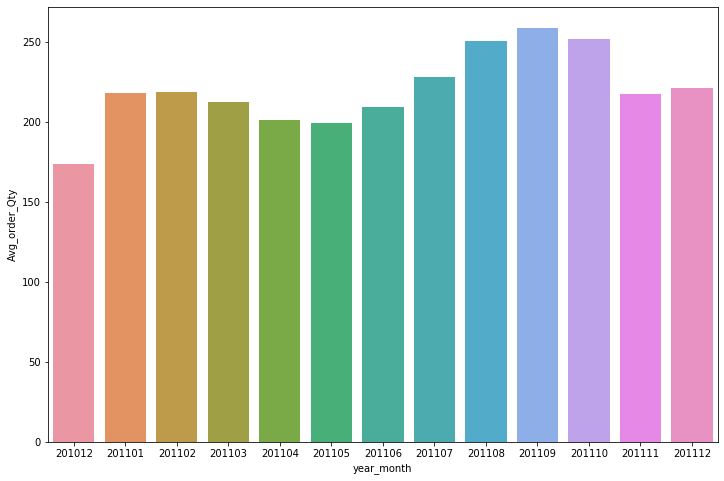

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(temp5['year_month'], temp5['Avg_order_Qty'])

### KPI VI - Active Customers

In [40]:
temp6 = df.groupby('year_month').nunique()['CustomerID'].reset_index()

In [41]:
temp6

,year_month,CustomerID
0,201012,948
1,201101,783
2,201102,798
3,201103,1020
4,201104,899
5,201105,1079
6,201106,1051
7,201107,993
8,201108,980
9,201109,1302


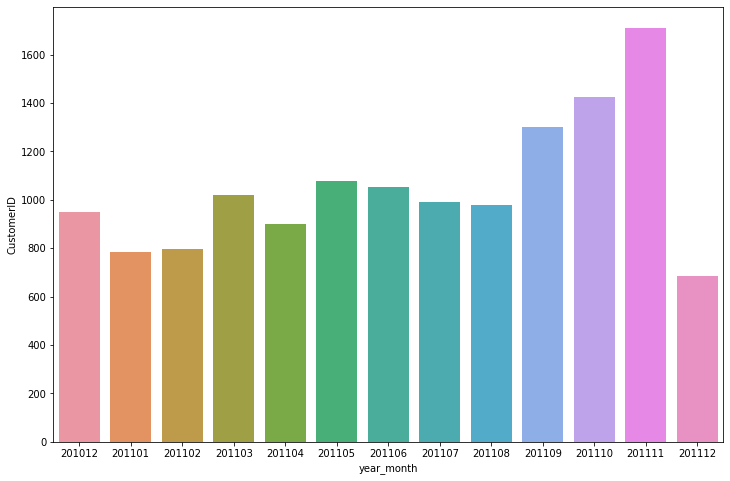

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(temp6['year_month'], temp6['CustomerID'])

### KPI VII - New Customers

In [43]:
temp7 = df[df['cust_type']=='new_cust'].groupby(['year_month']).nunique()['CustomerID'].reset_index()

In [44]:
temp7

,year_month,CustomerID
0,201012,948
1,201101,421
2,201102,380
3,201103,440
4,201104,299
5,201105,279
6,201106,235
7,201107,191
8,201108,167
9,201109,298


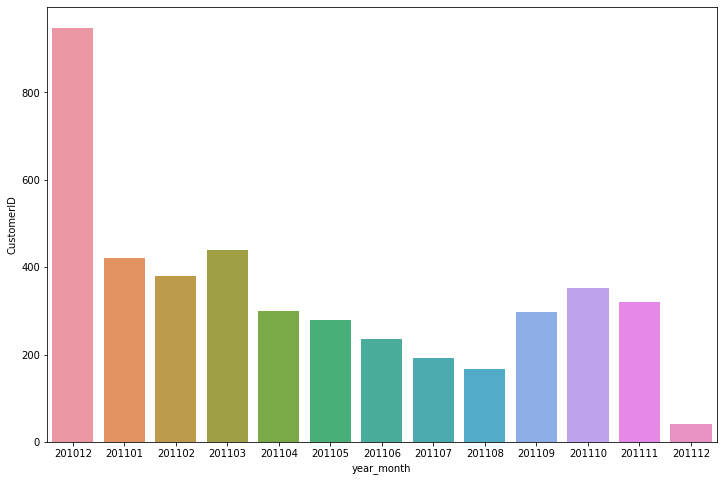

In [45]:
plt.figure(figsize=(12,8))
sns.barplot(temp7['year_month'], temp7['CustomerID'])

### KPI VIII - New Customers Vs Existing Customers

In [46]:
temp8 = df[df['cust_type']=='existing_cust'].groupby(['year_month']).nunique()['CustomerID'].reset_index()

In [47]:
temp8

,year_month,CustomerID
0,201101,362
1,201102,418
2,201103,580
3,201104,600
4,201105,800
5,201106,816
6,201107,802
7,201108,813
8,201109,1004
9,201110,1073


In [48]:
temp8 = temp7.merge(temp8, 'left', on='year_month')

In [49]:
temp8.columns = ['year_month', 'new_cust', 'existing_cust']

In [50]:
temp8.fillna(0, inplace=True)

In [51]:
temp8['year_month'] = temp8['year_month'].astype(str)

In [52]:
temp8

,year_month,new_cust,existing_cust
0,201012,948,0.0
1,201101,421,362.0
2,201102,380,418.0
3,201103,440,580.0
4,201104,299,600.0
5,201105,279,800.0
6,201106,235,816.0
7,201107,191,802.0
8,201108,167,813.0
9,201109,298,1004.0


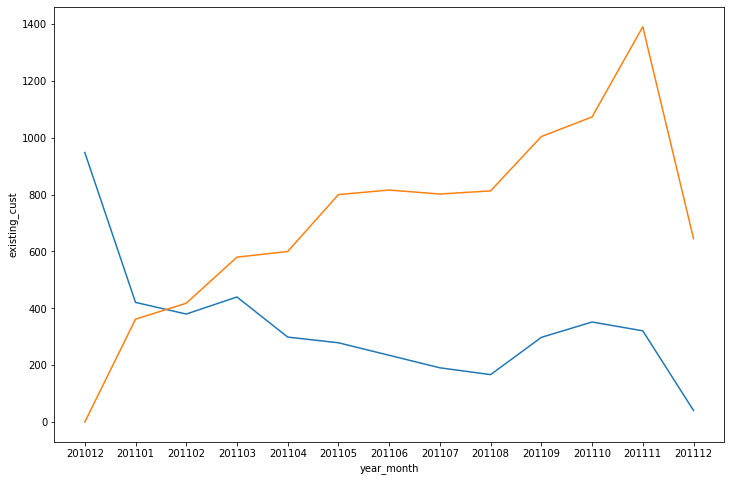

In [53]:
plt.figure(figsize=(12,8))
sns.lineplot(temp8['year_month'], temp8['new_cust'])
sns.lineplot(temp8['year_month'], temp8['existing_cust'])

### KPI IX - Retention Rate

In [54]:
temp9 = pd.crosstab(df['CustomerID'], df['year_month'])

In [55]:
temp9[temp9>0] = 1

In [56]:
temp9

year_month,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
CustomerID,,,,,,,,,,,,,
12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1
12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0
12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [57]:
columns = temp9.columns

In [58]:
columns

Int64Index([201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107,
            201108, 201109, 201110, 201111, 201112],
           dtype='int64', name='year_month')

In [59]:
retention_year_month = []
customers = []
retention=[]
for i in range(len(columns)-1):
    y = temp9[(temp9[columns[i+1]]>0)&(temp9[columns[i]]>0)][columns[i+1]].sum()
    z = temp9[columns[i+1]].sum()
    retention_year_month.append(columns[i+1])
    retention.append(y)
    customers.append(z)

In [60]:
retention = pd.DataFrame(retention)
retention_year_month= pd.DataFrame(retention_year_month)
customers = pd.DataFrame(customers)

In [61]:
retention_year_month.columns = ['year_month']
retention_year_month['retention'] = retention
retention_year_month['number_of_customers'] = customers

In [62]:
retention_year_month['retention_rate'] = retention_year_month['retention']/retention_year_month['number_of_customers']

In [63]:
retention_year_month['year_month'] = retention_year_month['year_month'].astype(str)

In [64]:
retention_year_month

,year_month,retention,number_of_customers,retention_rate
0,201101,362,783,0.462324
1,201102,299,798,0.374687
2,201103,345,1020,0.338235
3,201104,346,899,0.384872
4,201105,399,1079,0.369787
5,201106,464,1051,0.441484
6,201107,415,993,0.417925
7,201108,433,980,0.441837
8,201109,465,1302,0.357143
9,201110,552,1425,0.387368


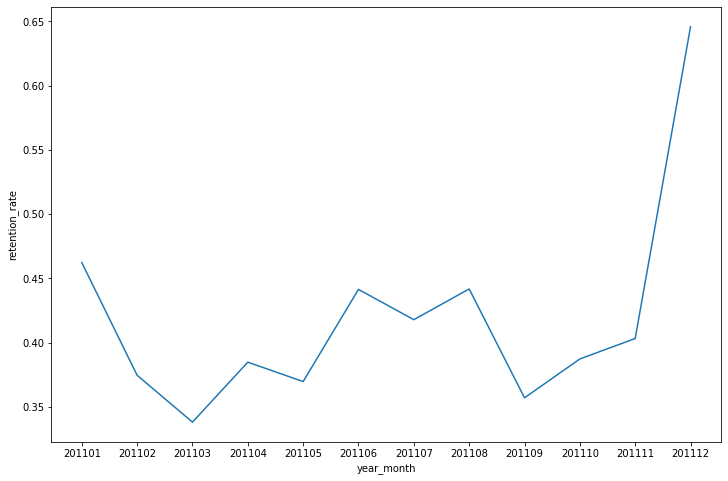

In [65]:
plt.figure(figsize=(12,8))
sns.lineplot(retention_year_month['year_month'], retention_year_month['retention_rate'])

### KPI X - Churn Rate

In [66]:
retention_year_month['churn_rate'] = 1-retention_year_month['retention_rate']

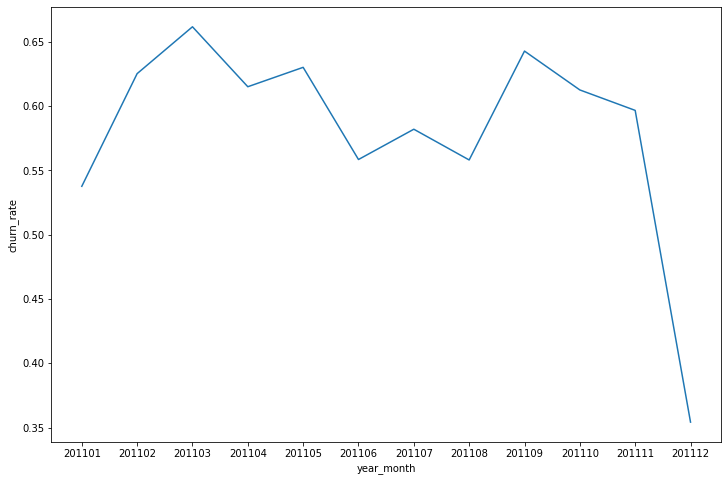

In [67]:
plt.figure(figsize=(12,8))
sns.lineplot(retention_year_month['year_month'], retention_year_month['churn_rate'])